# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

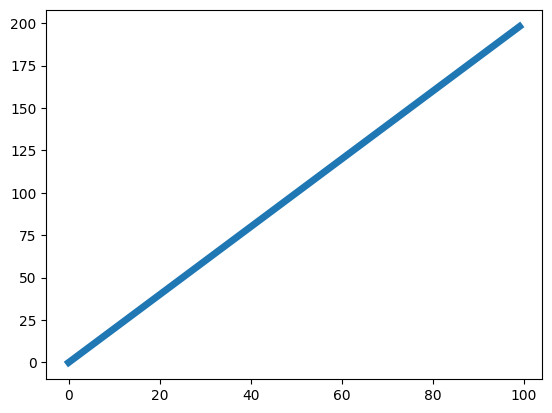

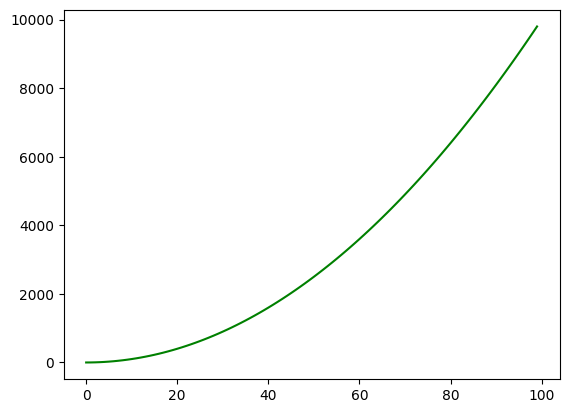

In [3]:
# Method 1

plt.plot(x,y, linewidth=5)
plt.show()


plt.plot(x,z, 'g')
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

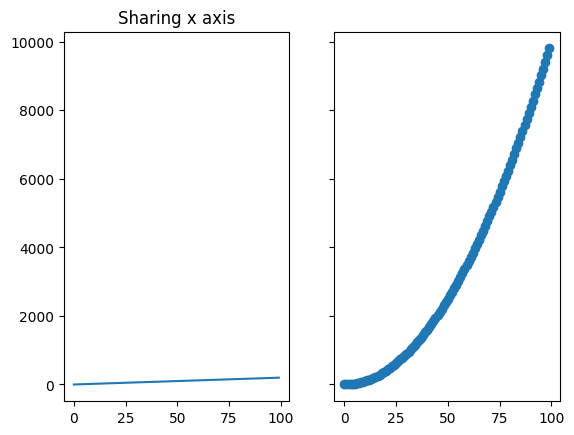

In [4]:
# Method 2

# Create two subplots and unpack the output array immediately
figure, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing x axis')
ax2.scatter(x, z)




#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

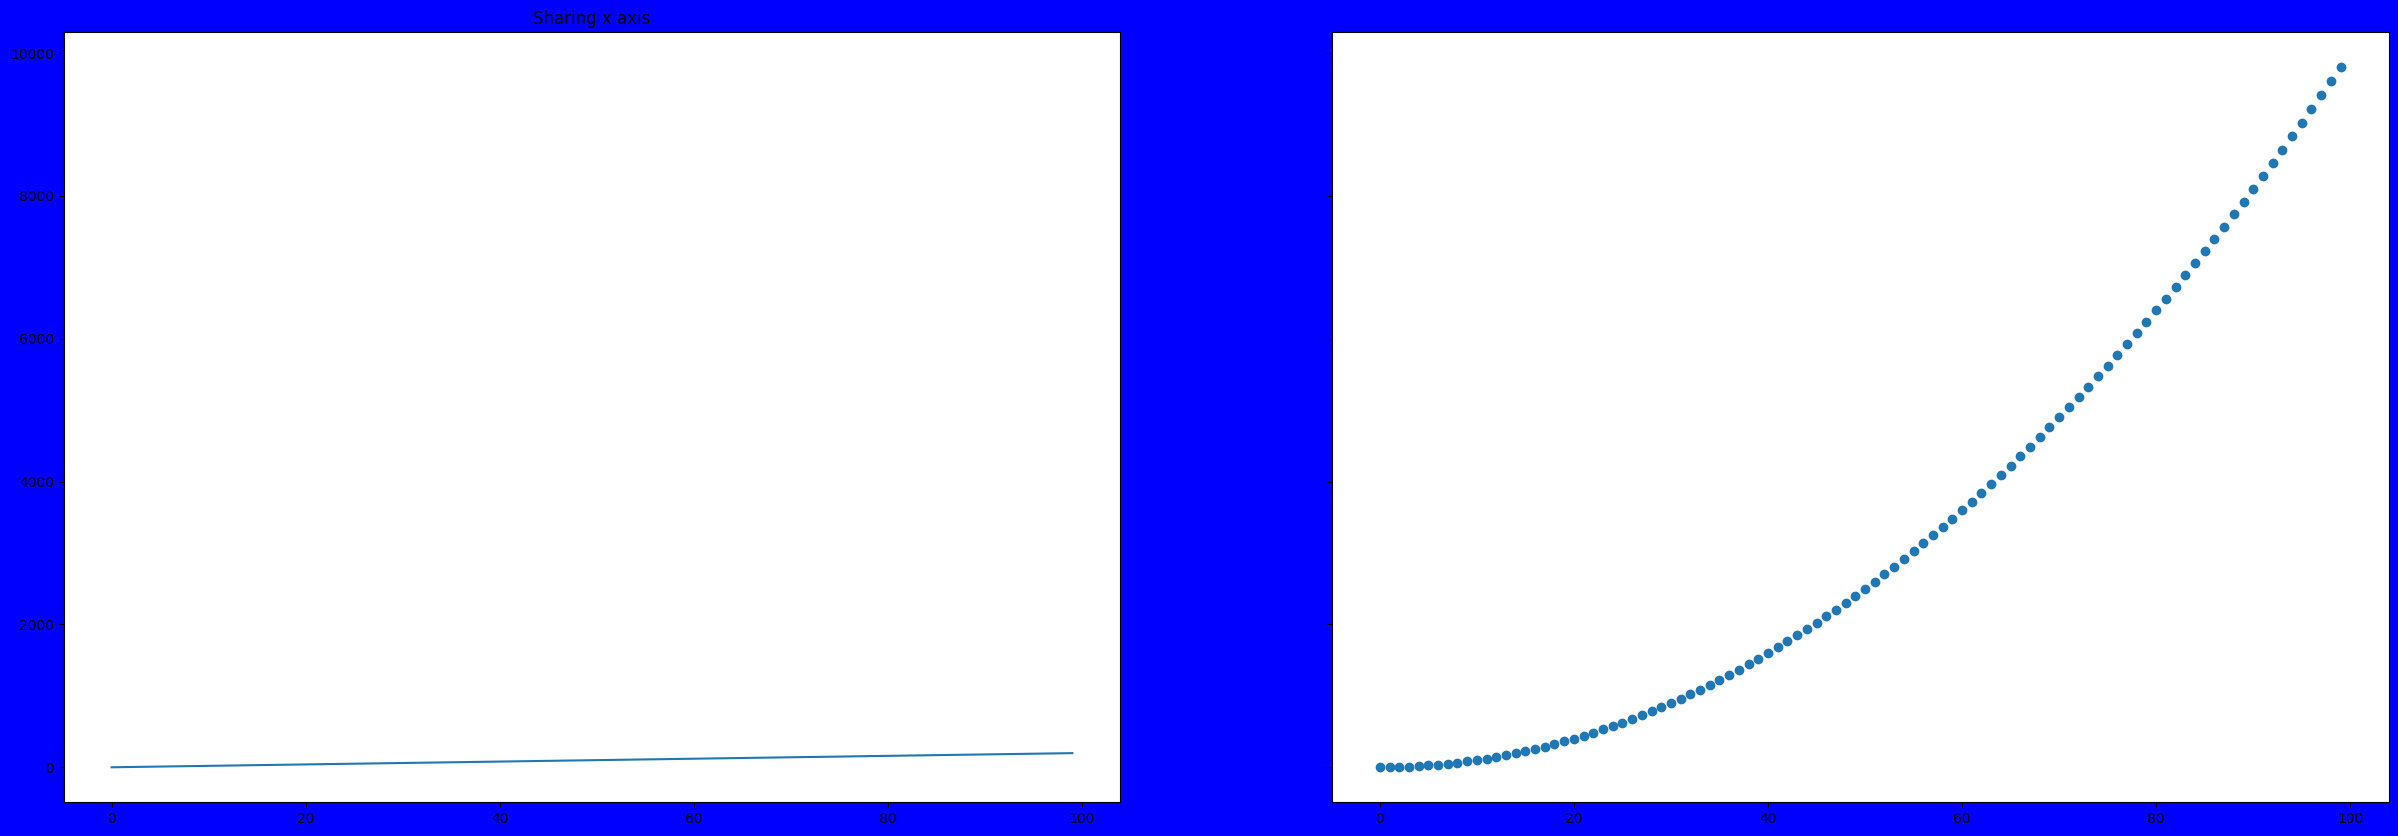

In [5]:
# your code here

figure, (ax1, ax2) = plt.subplots(1, 2, sharey=True, facecolor='blue', figsize = (30,10))
ax1.plot(x, y)
ax1.set_title('Sharing x axis')
ax2.scatter(x, z)


#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

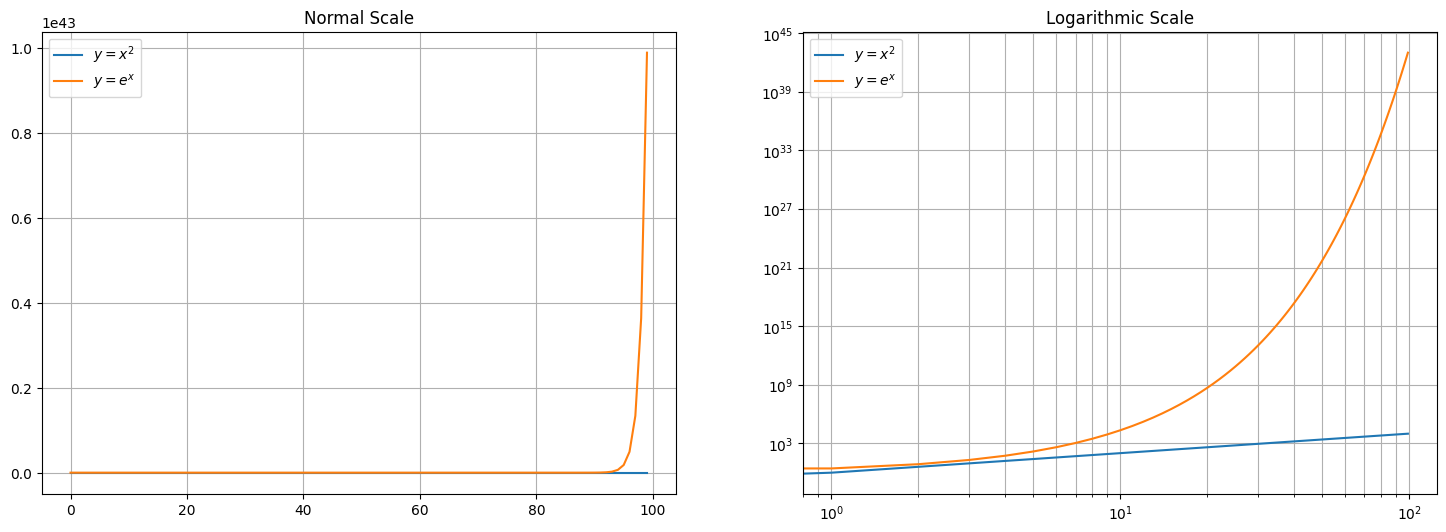

In [6]:
# your code here
y = x**2
y1 = np.exp(x)


# Create the plots
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Normal scale
ax1.plot(x, y, label='$y = x^2$')
ax1.plot(x, y1, label='$y = e^x$')
ax1.set_title('Normal Scale')
ax1.legend()
ax1.grid(True)

# Logarithmic scale for y-axis
ax2.plot(x, y, label='$y = x^2$')
ax2.plot(x, y1, label='$y = e^x$')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_title('Logarithmic Scale')
ax2.legend()
ax2.grid(True, which="both")



# Display the plot
plt.show()

#### As a bonus challenge, try to add a legend to the plot.

In [7]:
# your code here

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [8]:
# your code here

df = pd.read_csv("Fitbit2.csv")

df.head()


,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

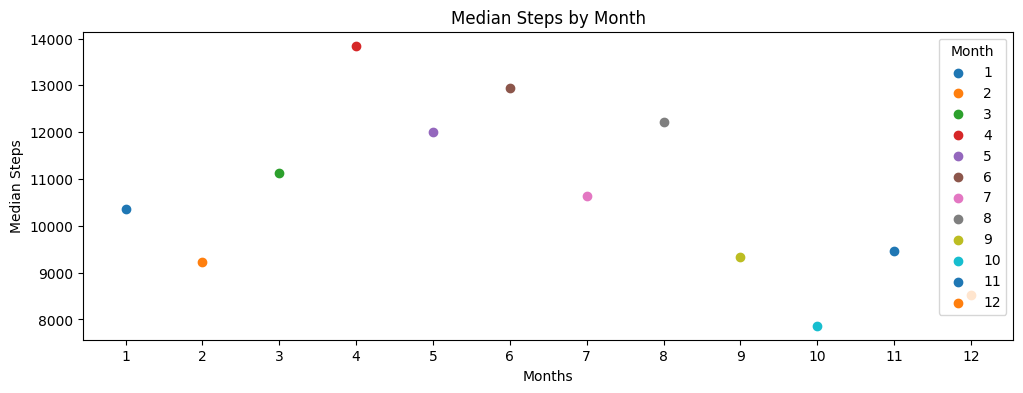

In [9]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here

# Group the data by month and workday/weekend and calculate the median steps
grouped = df.groupby(['Months_encoded'])['Steps'].median().reset_index()

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 4))

plt.sca(ax)

# Plotting for each unique day type (Workday or Weekend)
for month_encoded in grouped['Months_encoded'].unique():
    subset = grouped[grouped['Months_encoded'] == month_encoded]
    plt.scatter(subset['Months_encoded'], subset['Steps'], label=month_encoded)

# Adding labels and title
plt.xlabel('Months')
plt.ylabel('Median Steps')
plt.title('Median Steps by Month')
ax.set_xticks(range(1, 13))
plt.legend(title='Month', loc = "upper right")
plt.show()




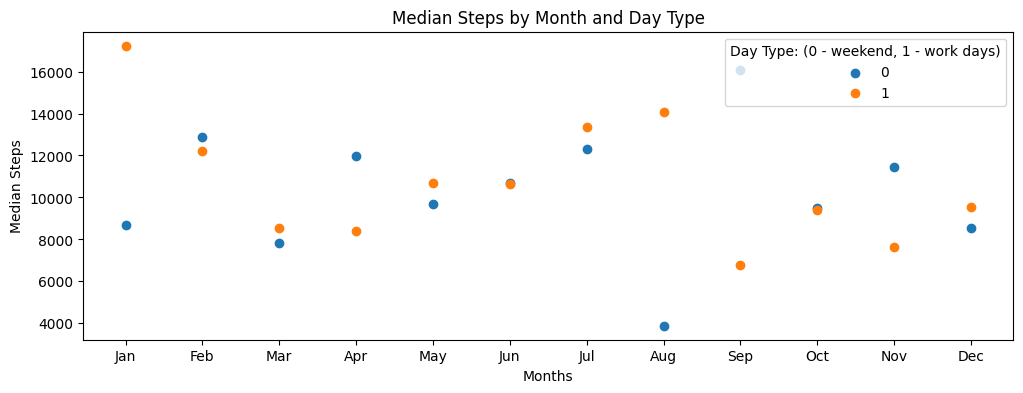

In [10]:
# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here

grouped = df.groupby(['Months', 'Work_or_Weekend'])['Steps'].median().reset_index()

plt.figure(figsize=(12, 4))

for day_type in grouped['Work_or_Weekend'].unique():
    subset = grouped[grouped['Work_or_Weekend'] == day_type]
    plt.scatter(subset['Months'], subset['Steps'], label=day_type)

plt.xlabel('Months')
plt.ylabel('Median Steps')
plt.title('Median Steps by Month and Day Type')
plt.legend(title='Day Type: (0 - weekend, 1 - work days)', loc = "upper right")

unique_months = sorted(df['Months'].unique())
plt.xticks(ticks=unique_months, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()





#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

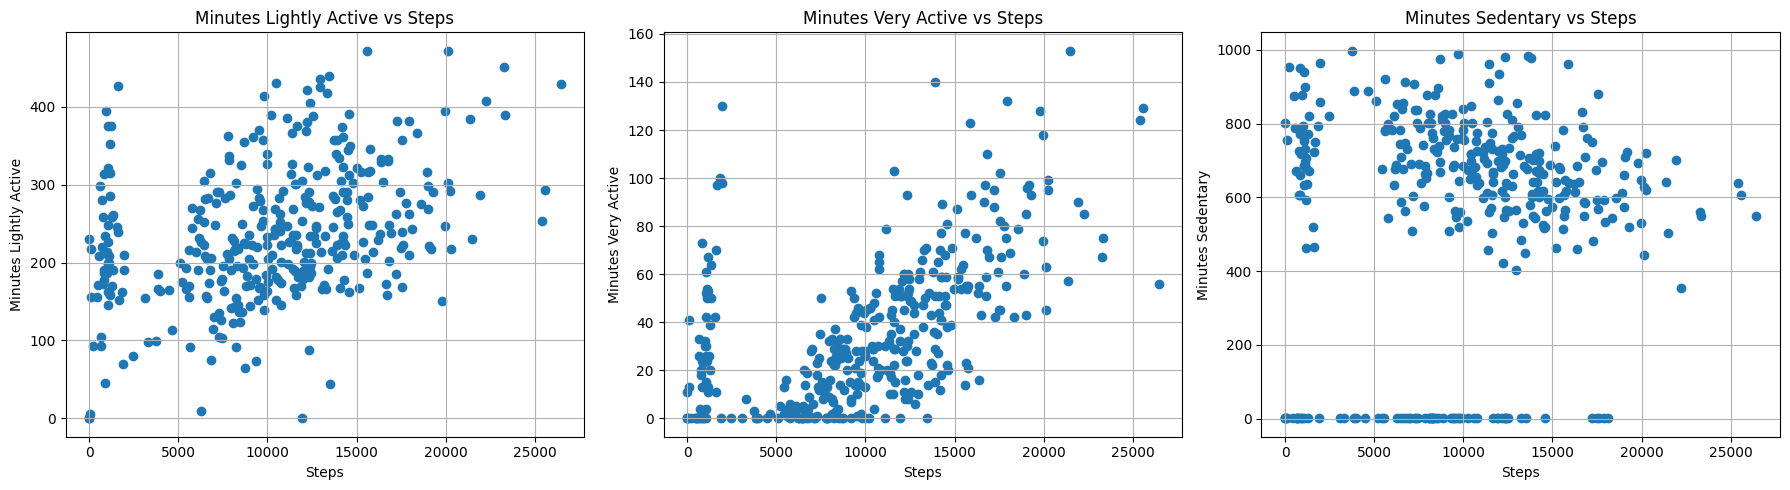

In [11]:
# your code here


features = [
    'Minutes Lightly Active',
    'Minutes Very Active',
    'Minutes Sedentary']


titles = [
    'Minutes Lightly Active vs Steps',
    'Minutes Very Active vs Steps',
    'Minutes Sedentary vs Steps']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Loop to create scatter plots
for i, feature in enumerate(features):
    ax = axes[i]
    ax.scatter(df['Steps'],df[feature])
    ax.set_xlabel('Steps')
    ax.set_ylabel(feature)
    ax.set_title(titles[i])
    ax.grid(True)


plt.tight_layout()

plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [12]:
# your code here

titanic = pd.read_csv("titanic.csv")

titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [13]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [64]:
# NUMERICAL VARIABLES
# your code here
numeric = titanic.select_dtypes(include = ["int64","float64"])
display(numeric)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [15]:
# CATEGORICAL VARIABLES
# your code here

titanic.select_dtypes(include = ["object"])

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


####Set the plot style to classic and the figure size to (12,6). 
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [16]:
# your code here

import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

sns.set_style("whitegrid")

#### Use the right visulalization to show the distribution of column `Age`.

c:\Users\Yuliya Lavrenyuk\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


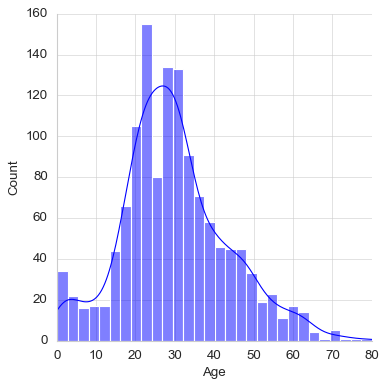

In [17]:
# your code here

sns.displot(titanic, x = "Age", kde = True)

plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

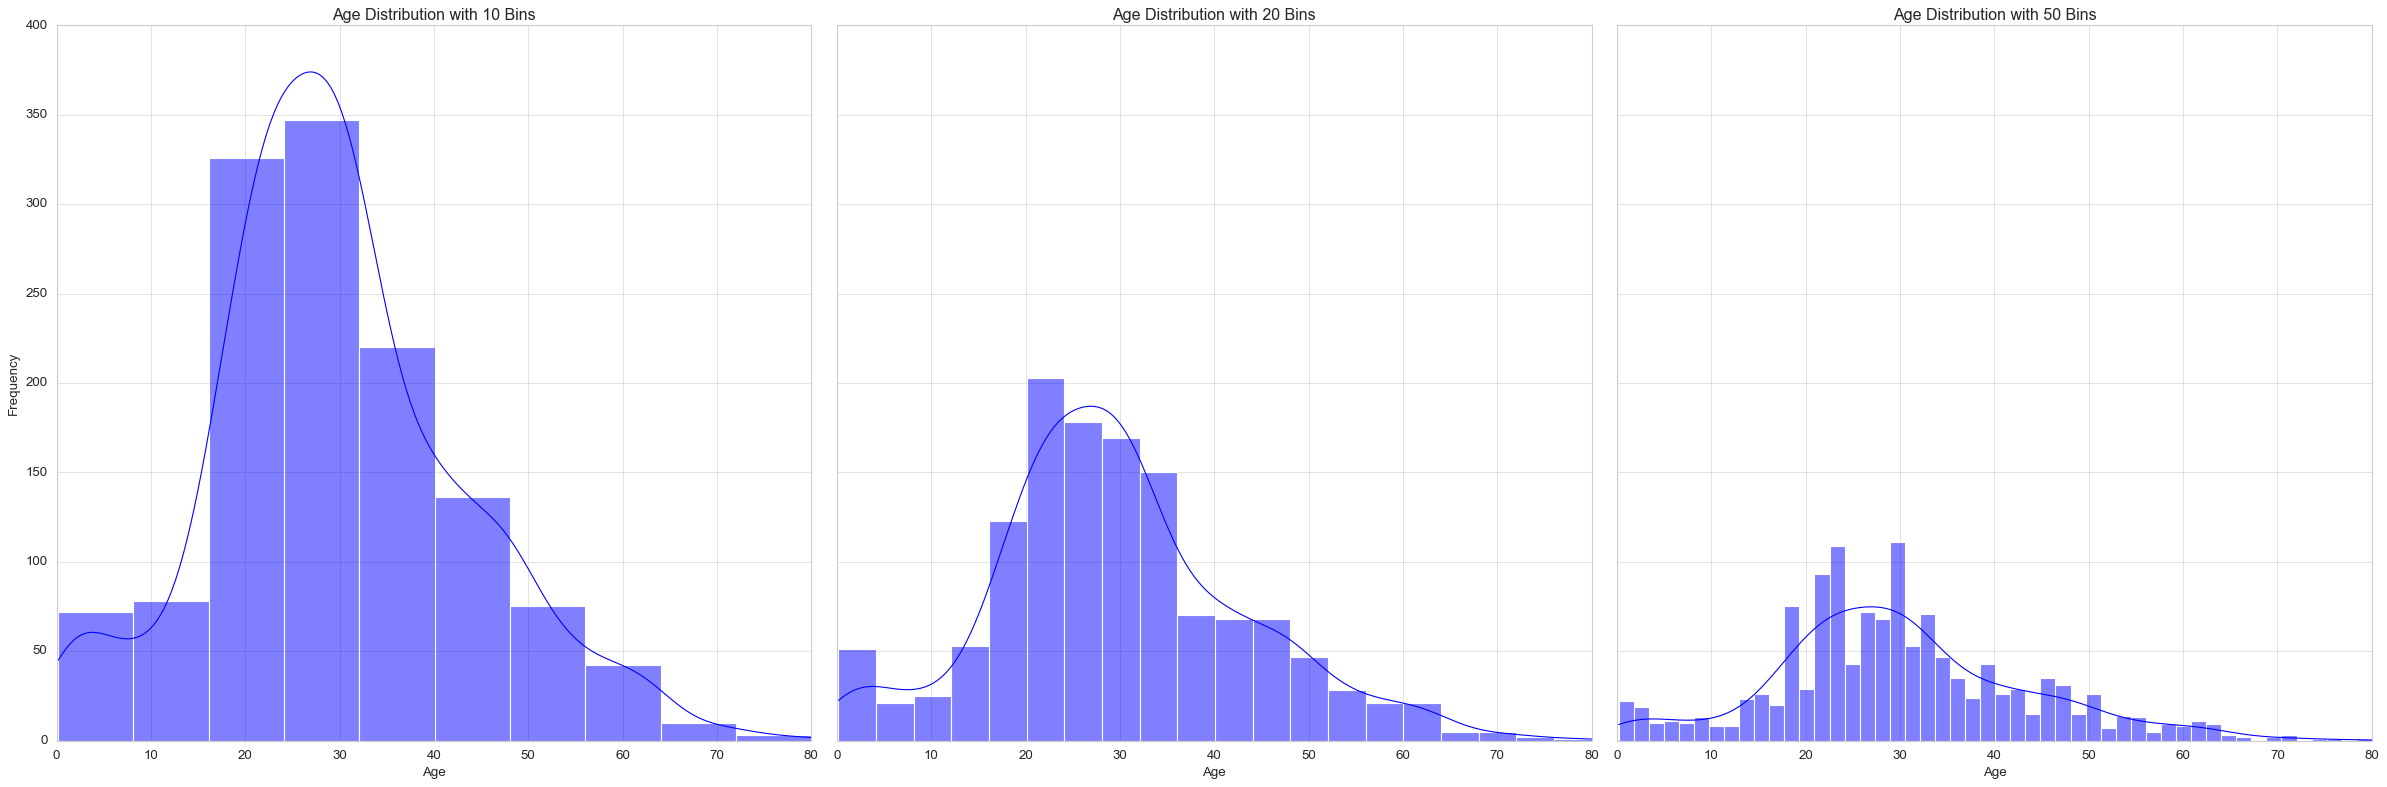

In [18]:
# your code here

# your code here
figure, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(30, 10))

# Create histograms with different numbers of bins
sns.histplot(titanic, x="Age", bins=10, ax=ax1, kde=True)
sns.histplot(titanic, x="Age", bins=20, ax=ax2, kde=True)
sns.histplot(titanic, x="Age", bins=50, ax=ax3, kde=True)

# Set titles for the subplots
ax1.set_title('Age Distribution with 10 Bins')
ax2.set_title('Age Distribution with 20 Bins')
ax3.set_title('Age Distribution with 50 Bins')

# Set x and y labels
for ax in (ax1, ax2, ax3):
    ax.set_xlabel('Age')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


#### How does the bin size affect your plot?

In [20]:
"""
your comments here
"""

#the number of bins change a scale of graph

'\nyour comments here\n'

#### Use seaborn to show the distribution of column `Age`.

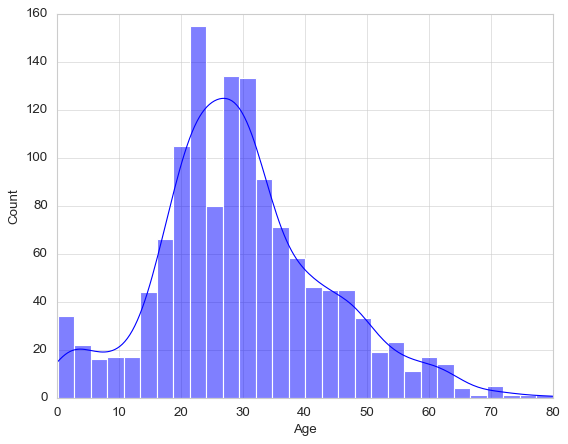

In [24]:
# your code here

sns.histplot(titanic, x = "Age", kde = True)

plt.show()

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

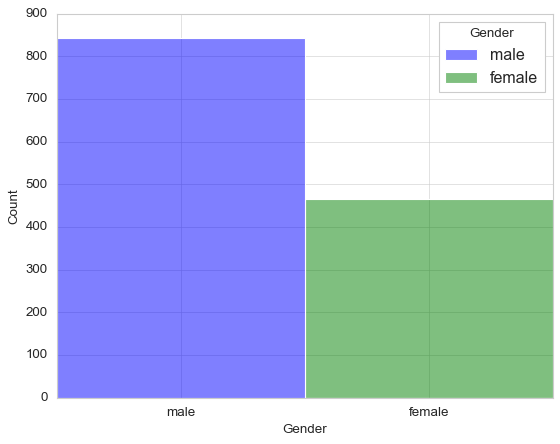

In [34]:
# Method 1 - seaborn
# your code here

sns.histplot(titanic, x = "Gender", hue="Gender")

plt.show()

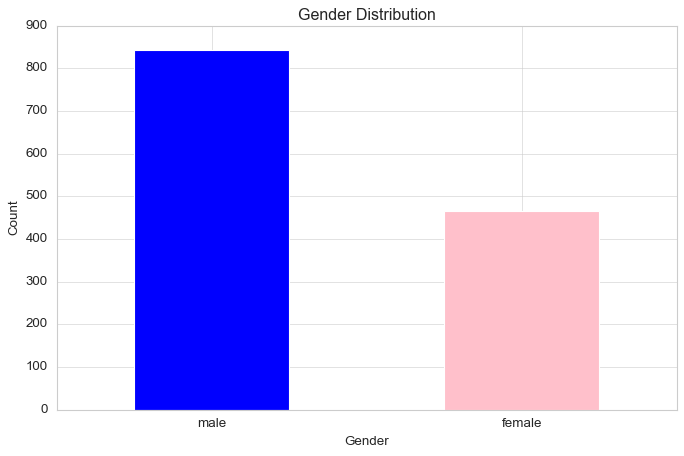

In [38]:
# Method 2 - matplotlib
# your code here

gender_counts = titanic['Gender'].value_counts()


plt.figure(figsize=(10, 6))
gender_counts.plot(kind='bar', color=['blue', 'pink'])

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

#### Use the right plot to visualize the column `Pclass`.

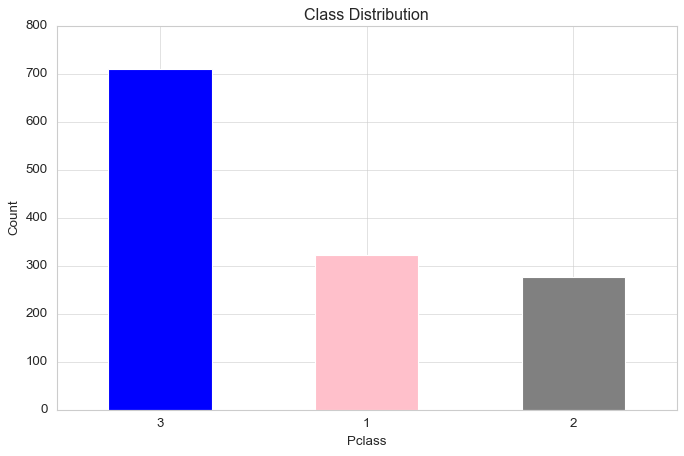

In [48]:
# your code here

gender_counts = titanic['Pclass'].value_counts()


plt.figure(figsize=(10, 6))
gender_counts.plot(kind='bar', color=['blue', 'pink', 'grey'])

plt.title('Class Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

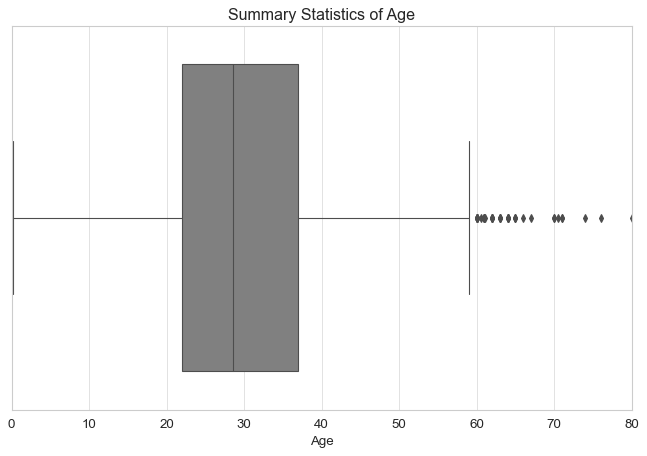

In [50]:
# your code here
plt.figure(figsize=(10, 6))
sns.boxplot(x=titanic['Age'], color = 'grey')

plt.title('Summary Statistics of Age')
plt.xlabel('Age')
plt.show()

In [ ]:
"""
your comments here
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here
"""
#we can see range, outliers, median, all 4 quartilles

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [52]:
# your code here
# i dont understand how i can realize it

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

In [57]:

from sklearn import linear_model
from sklearn.metrics import mean_squared_error

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

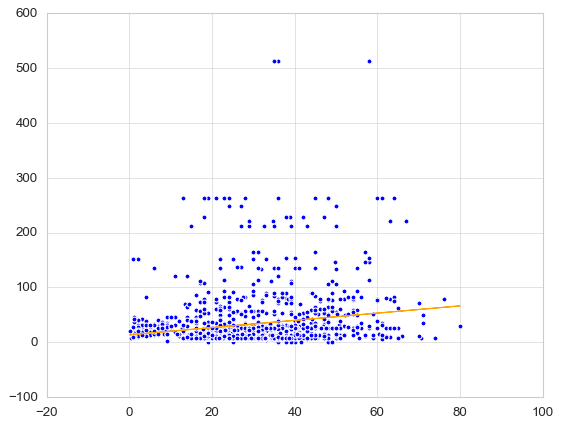

In [59]:
# Method 1 - matplotlib
x= titanic[["Age"]]
y = titanic["Fare"]

model = linear_model.LinearRegression()

result = model.fit(x,y)

regression_line  = result.intercept_ + result.coef_*x

plt.plot(x, regression_line,c = "orange")

plt.scatter(x,y)
plt.show()


c:\Users\Yuliya Lavrenyuk\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


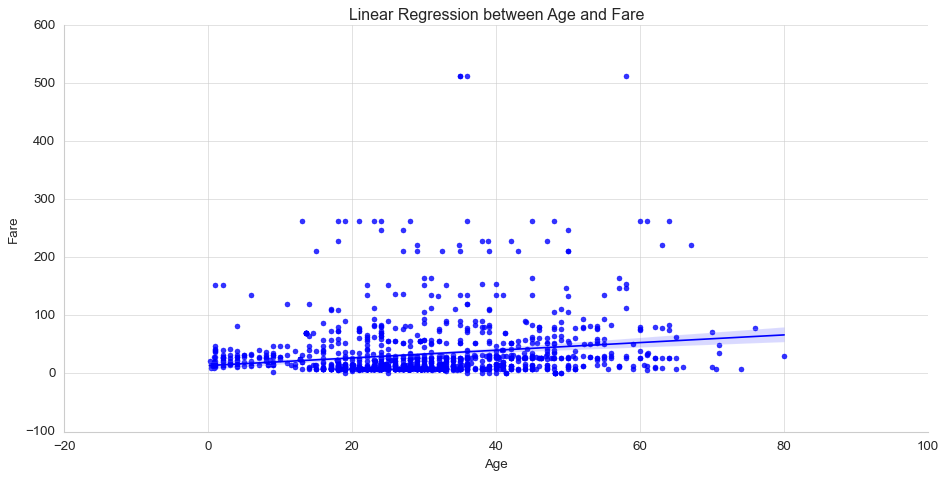

In [62]:
# Method 2 - seaborn
# your code here

sns.lmplot(x='Age', y='Fare', data=titanic, aspect=2, height=6)
plt.title('Linear Regression between Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

#### Plot the correlation matrix using seaborn.

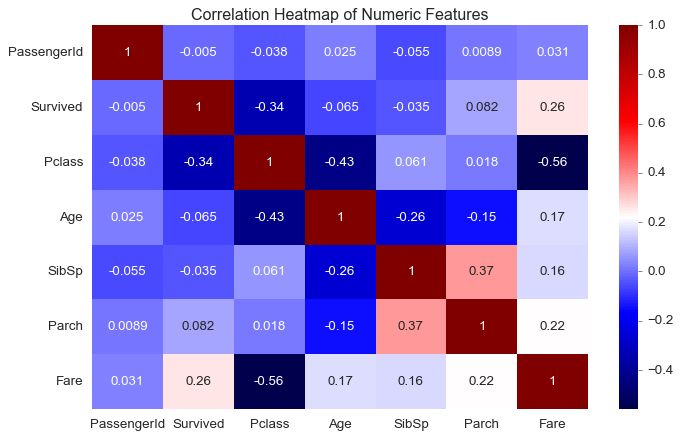

In [65]:
# your code here


corr_matrix = numeric.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='seismic')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

#### What are the most correlated features?

In [ ]:
"""
your comments here
"""

#Pclass- Fare - 0.56
#Age - Pclass - -0.43
#SibSp - Parch - 0.36
#Survived - Pclass - -0.34
#Survived - Fare - 0.26


#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

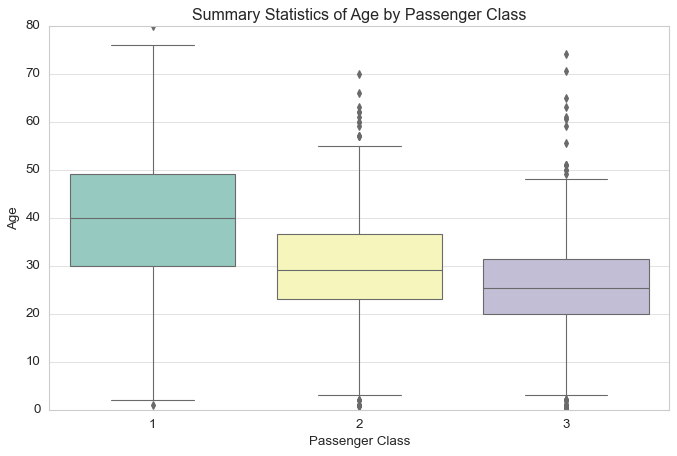

In [66]:
# your code here

plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=titanic, palette='Set3')


plt.title('Summary Statistics of Age by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')

plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

c:\Users\Yuliya Lavrenyuk\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


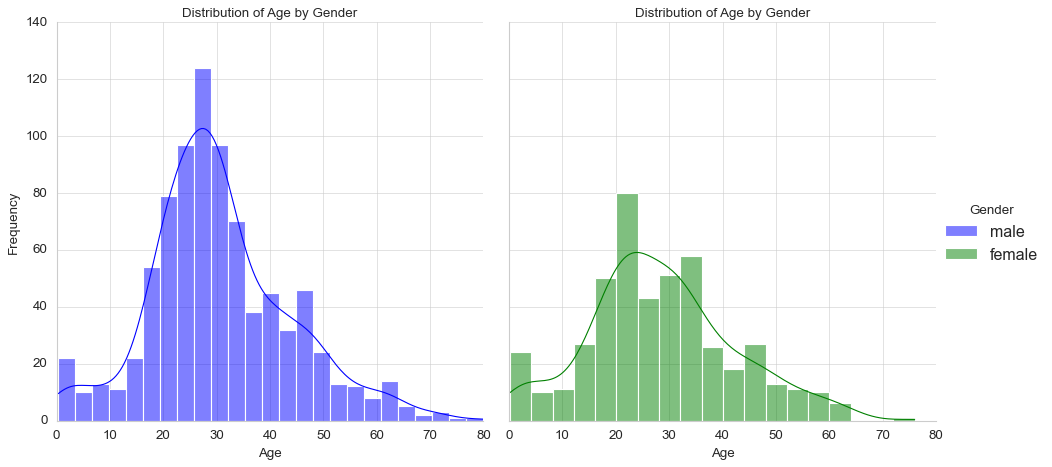

In [73]:
# your code here
graph = sns.FacetGrid(titanic, col='Gender',hue = 'Gender', height=6, aspect=1)
graph.map(sns.histplot, 'Age', kde=True)

graph.set_titles('Distribution of Age by Gender')
graph.set_axis_labels('Age', 'Frequency')
graph.add_legend()
plt.show()